In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer

In [13]:
df = pd.read_csv('concrete.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [14]:
X = df.drop(columns=['Strength'])
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

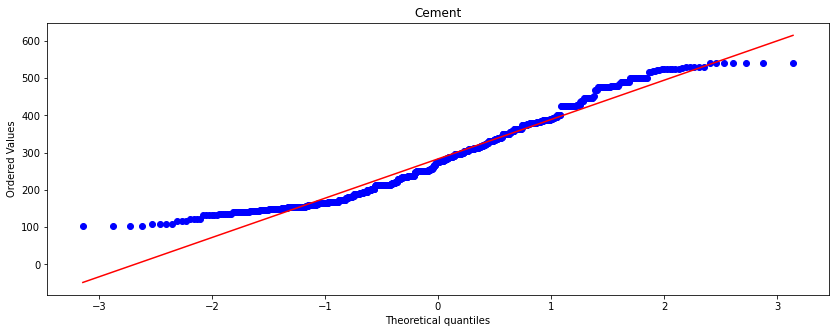

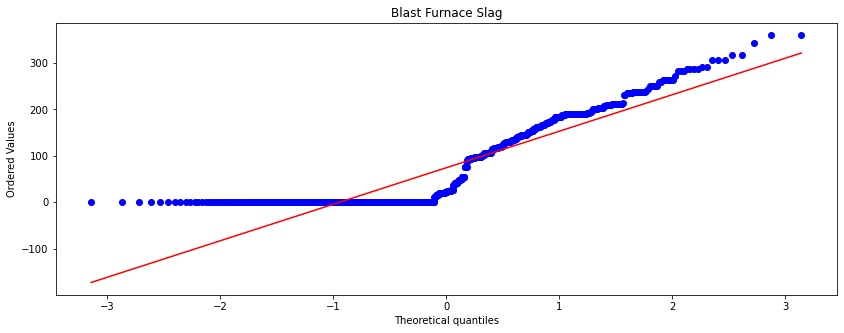

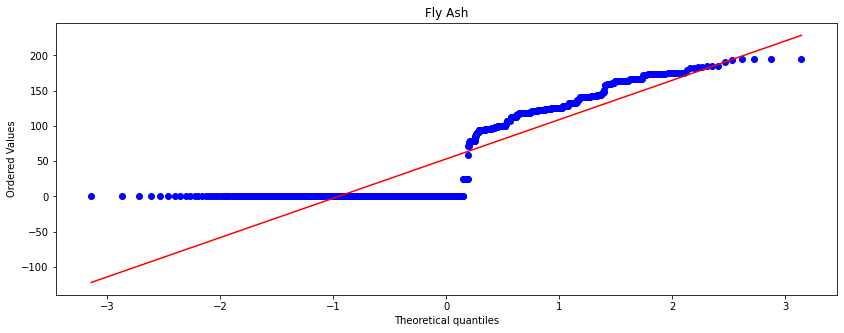

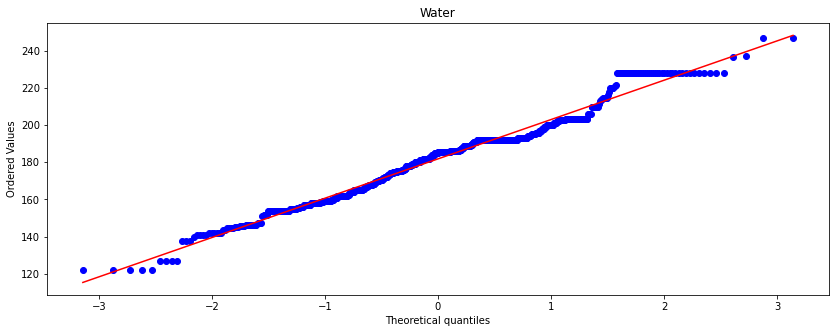

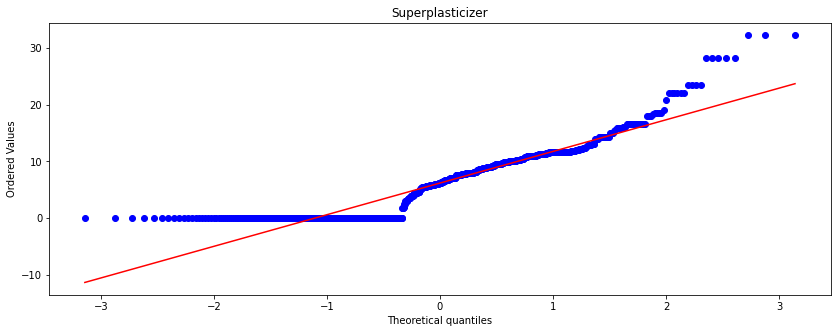

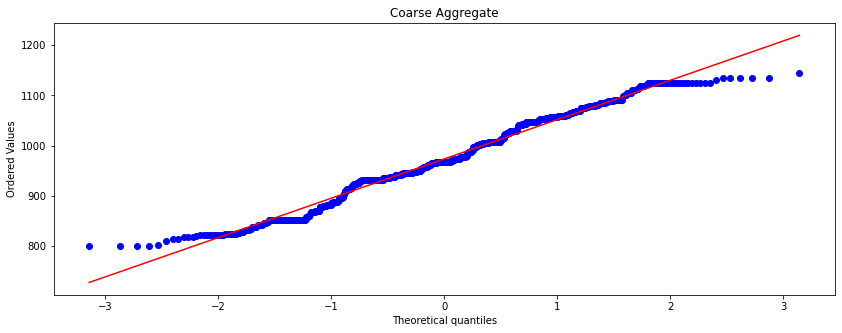

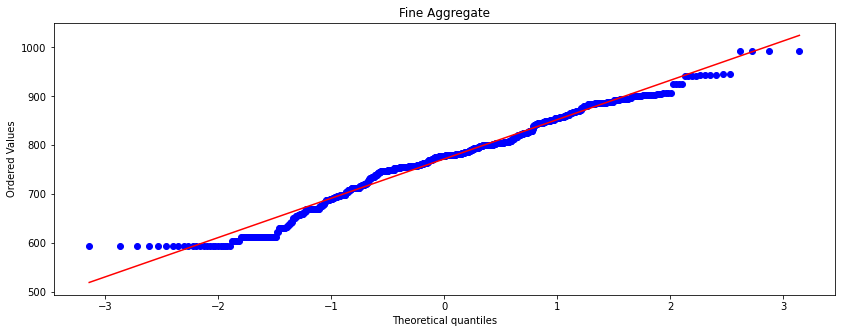

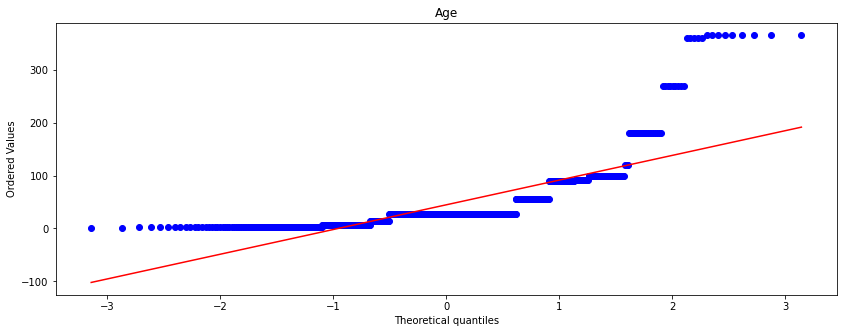

In [18]:
# Plotting the distplots without any transformation
for col in X_train.columns:
    plt.figure(figsize=(14,5))
    stats.probplot(X_train[col],dist='norm',plot=plt)
    plt.title(col)
    plt.show()
    

# Without powertransformer

In [19]:
# Applying Regression without any transformation
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.6275531792314851

In [20]:
# Cross checking with cross val score
np.mean(cross_val_score(lr,X,y))

0.4609940491662865

In [21]:
# Applying Box-Cox Transform
pt = PowerTransformer(method='box-cox')
X_train_transformed = pt.fit_transform(X_train+0.00001)
X_test_transformed = pt.transform(X_test+0.00001)
pd.DataFrame({'cols':X_train.columns,'box-cox-lambda':pt.lambdas_})

,cols,box-cox-lambda
0,Cement,0.177025
1,Blast Furnace Slag,0.027842
2,Fly Ash,-0.044554
3,Water,0.772682
4,Superplasticizer,0.113892
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066630


In [22]:
# Applying linear regression on transformed data
lr = LinearRegression()
lr.fit(X_train_transformed,y_train)
y_pred = lr.predict(X_test_transformed)
r2_score(y_test,y_pred)

0.8054599377211109

In [17]:
# Apply Yeo-Johnson transform and linear regression
pt1 = PowerTransformer()
X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transformed2,y_train)
y_pred3 = lr.predict(X_test_transformed2)
print(r2_score(y_test,y_pred3))
pd.DataFrame({'cols':X_train.columns,'Yeo_Johnson_lambdas':pt1.lambdas_})

0.8161906513354854


,cols,Yeo_Johnson_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [18]:
# applying cross val score

pt = PowerTransformer()
X_transformed2 = pt.fit_transform(X)


np.mean(cross_val_score(lr,X_transformed2,y,scoring='r2'))

0.6834625141500861